<a href="https://colab.research.google.com/github/mayssajeb94/Test_DS/blob/master/TEST_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

#This will ask for permission
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json
import pandas as pd
from pandas.io.json import json_normalize

#lire la base de données 
jsondata=pd.read_json ('/content/drive/My Drive/Brisbane_CityBike.json')
df = pd.DataFrame.from_dict(jsondata, orient='columns')
df

,number,name,address,latitude,longitude
0,122,122 - LOWER RIVER TCE / ELLIS ST,Lower River Tce / Ellis St,-27.482279,153.028723
1,91,91 - MAIN ST / DARRAGH ST,Main St / Darragh St,-27.470590,153.036046
2,88,88 - SYDNEY ST FERRY TERMINAL / PARK,Sydney St Ferry Terminal / Park,-27.474531,153.042728
3,75,75 - BROWNE ST / JAMES ST,Browne St / James St,-27.461881,153.046986
4,98,98 - KURILPA POINT / MONTAGUE RD,Kurilpa Point / Montague Rd,-27.469658,153.016696
...,...,...,...,...,...
144,38,38 - ANN ST / CREEK ST,38 - Ann St / Creek St,-27.465880,153.026861
145,14,14 - ALBERT STREET MALL / ELIZABETH STREET,Albert St Mall / Elizabeth St,-27.470110,153.025627
146,45,45 - TURBOT ST / BOWEN ST,Turbot St / Bowen St,-27.462665,153.029087
147,1,1 - EDWARD ST / QUEEN ST,Edward St / Queen St,-27.468120,153.026820



# Hierarchical ascending classification

Preparing Input Data  works only on numerical features and so it needs to quantify the features in order to calculate distance between data objects.

In [0]:
newdf= df[['number','latitude','longitude']]
newdf

,number,latitude,longitude
0,122,-27.482279,153.028723
1,91,-27.470590,153.036046
2,88,-27.474531,153.042728
3,75,-27.461881,153.046986
4,98,-27.469658,153.016696
...,...,...,...
144,38,-27.465880,153.026861
145,14,-27.470110,153.025627
146,45,-27.462665,153.029087
147,1,-27.468120,153.026820


In [0]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#générer la matrice des liens
Z = linkage(newdf,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=newdf.index,orientation='left',color_threshold=0)
plt.show()

Le dendrogramme  suggère  un découpage en 3 groupes

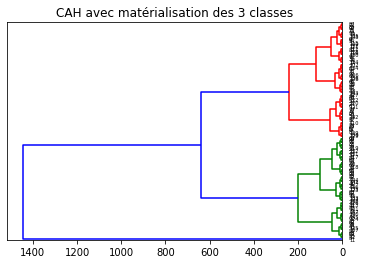

[2 2 2 2 2 2 2 2 1 2 2 3 1 1 2 1 2 2 2 2 1 1 1 1 2 2 2 1 1 1 1 2 2 1 2 1 1
 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 2 1 1 1 1 1 2 2 1 2 2 1 1 2 1 2 1 1 2 2
 2 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2 1 1 2 2 1 2 2 2 1 1 2 1 2 1 1 2 2 1 2 2 2
 2 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2 2 2 2 1 1 1 2 1 2 2 1 2 1 1 2 2 1 1 1 1
 2]


In [0]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np

#matérialisation des 3 classes 
plt.title('CAH avec matérialisation des 3 classes')
dendrogram(Z,labels=newdf.index,orientation='left',color_threshold=400)
plt.show()
#découpage à la hauteur t = 400 ==> identifiants de 3 groupes obtenus
groupes_cah = fcluster(Z,t=400,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)


In [0]:
#affichage des observations et leurs groupes
output=pd.DataFrame(newdf.index[idg],groupes_cah[idg])
print(output)
output.columns = ['number']


output.to_csv('/content/drive/My Drive/ Grpupes.csv')

      0
1   123
1    52
1   119
1   104
1    83
..  ...
2    54
2    51
2    75
2   148
3    11

[149 rows x 1 columns]


## Méthode des centres **mobiles** 'Kmeans'


In [0]:
#k-means sur les données centrées et réduites
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(newdf)
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
print(pd.DataFrame(newdf.index[idk],kmeans.labels_[idk]))
#distances aux centres de classes des observations
print(kmeans.transform(newdf))
#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)

     0
0    0
0   96
0   95
0   93
0   92
..  ..
1   94
1   29
1   49
1   99
2   11

[149 rows x 1 columns]
[[8.50000748e+00 8.28648668e+01 9.79000000e+02]
 [2.25000082e+01 5.18648654e+01 1.01000000e+03]
 [2.55000119e+01 4.88648671e+01 1.01300000e+03]
 [3.85000140e+01 3.58648682e+01 1.02600000e+03]
 [1.55000023e+01 5.88648670e+01 1.00300000e+03]
 [4.50002333e+00 6.98648723e+01 9.92000000e+02]
 [3.55000075e+01 1.09864873e+02 9.52000001e+02]
 [2.55000050e+01 9.98648698e+01 9.62000000e+02]
 [8.95000017e+01 1.51351764e+01 1.07700000e+03]
 [3.50000358e+00 7.78648676e+01 9.84000000e+02]
 [4.05000150e+01 3.38648702e+01 1.02800000e+03]
 [9.87500000e+02 1.06186486e+03 0.00000000e+00]
 [9.05000005e+01 1.61351383e+01 1.07800000e+03]
 [5.95000063e+01 1.48648673e+01 1.04700000e+03]
 [2.05000010e+01 5.38648681e+01 1.00800000e+03]
 [8.25000007e+01 8.13514142e+00 1.07000000e+03]
 [1.65000148e+01 5.78648773e+01 1.00400000e+03]
 [3.35000108e+01 1.07864874e+02 9.54000001e+02]
 [3.65000128e+01 3.78648667e

col_0,0,1,2
row_0,,,
1,0,69,0
2,74,5,0
3,0,0,1


## The Elbow method  
The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.


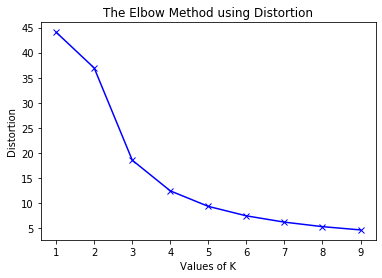

In [0]:
from scipy.spatial.distance import cdist

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    kmeanModel = cluster.KMeans(n_clusters=k).fit(newdf) 
    kmeanModel.fit(newdf)     
      
    distortions.append(sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / newdf.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / newdf.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


plt.plot(K, distortions, 'bx-') 
plt.xlabel('number of cluster') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 